## Exploratory Data Analysis

### 1. Reading the data and some cleaning

In [2]:
#Importing packages
import os
import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Change the dirctory for pickle file to be read
os.chdir(r"C:\Users\Sultan\Documents\GitHub\Budget_Text_Analysis\util\data\PreprocessedOriginalData") 


In [6]:
# Read the data file
data = pd.read_csv(r'PreprocessedOriginalDataAll.csv', engine='python')

In [7]:
# Take a look at the dataframe 
data

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013
...,...,...,...
3528440,index,Wake County,FY2020
3528441,fiscal,Wake County,FY2020
3528442,year,Wake County,FY2020
3528443,adopted,Wake County,FY2020


In [9]:
# Rename col 0
data.columns = ['word','organization','year']
data.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [6]:
# count, unique, top and frequency of 'word' column
data.word.describe()

count     3528445
unique      36734
top            fy
freq       102578
Name: word, dtype: object

In [7]:
# We would like to remove fy from the dataframe 
data['word'] = data['word'].str.replace('fy','')

# Replacing empty cells with null values, so we can drop all NaN values later
data['word'].replace('', np.nan, inplace=True)

# Drop all NaN values from the dataframe
data.dropna(subset=['word'], inplace=True)

In [8]:
# Lets discribe the dataframe again
data.word.describe()

count     3425549
unique      36704
top        county
freq        45071
Name: word, dtype: object

### 2. Most common words

Counting the frequency of words using python native Counter, <br/>
which has a nice most_common(n) function returning the top n
elements in the list.

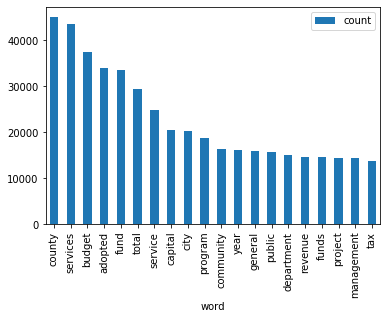

In [9]:
from collections import Counter 

counter = Counter(data.word)

# Top 20 words in the documents from 2013-2020
counter.most_common(20)

# Visualizing the top words
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                              columns=['word', 'count'])

# Create bar plot
freq_df.plot(kind='bar', x='word')

### 3. Group by year and visualize

In [10]:
data.groupby(['year']).groups.keys()

dict_keys(['FY2013', 'FY2014', 'FY2015', 'FY2016', 'FY2017', 'FY2018', 'FY2019', 'FY2020'])

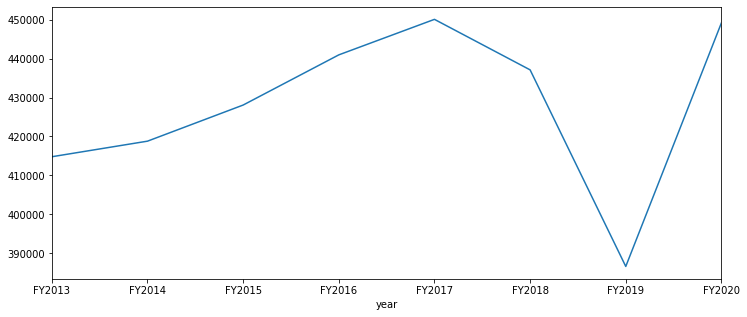

In [11]:
#plot data grouped by year and counting the word col
fig, ax = plt.subplots(figsize=(12,5))
data.groupby(['year']).count()['word'].plot(ax=ax)

In [12]:
# Lets verify what we just saw
# find the length of the data grouped by year and key ['FY2019']
len(data.groupby(['year']).groups['FY2019'])

386673

#### Now let's compare them organization wise

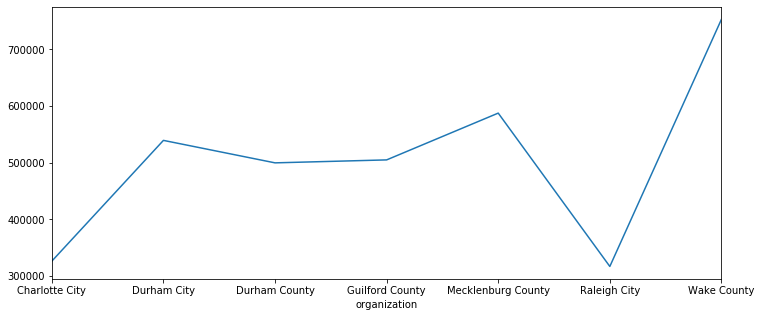

In [10]:
#plot data grouped by organization and counting the word col
fig, ax = plt.subplots(figsize=(12,5))
data.groupby(['organization']).count()['word'].plot(ax=ax)